In [1]:
# importing libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator as Imgen
from keras.models import Model,Sequential
from keras.layers import Input,Conv2D,MaxPooling2D,Dropout,Flatten,Dense,GlobalAveragePooling2D,BatchNormalization
from keras.callbacks import EarlyStopping,ModelCheckpoint

from sklearn.metrics import confusion_matrix,classification_report

In [2]:
#Data generation
traingen = Imgen(rescale=1./255,shear_range = 0.2, zoom_range = 0.2, width_shift_range = 0.2, height_shift_range = 0.2,
fill_mode="nearest", validation_split=0.15)              
 
testgen = Imgen(rescale=1./255)              

In [3]:
training_directory= r'C:\Users\SIC\Downloads\omnia\Training'
test_directory = r'C:\Users\SIC\Downloads\omnia\testing'

trainds = traingen.flow_from_directory(training_directory, target_size=(96,96),seed=123,batch_size=32,subset="training")
                                     
                                                                              
                                       
valds = traingen.flow_from_directory(training_directory, target_size=(96,96), seed=123, batch_size=32,subset="validation")
                                     
                                                                            
                                      
testds = testgen.flow_from_directory(test_directory, target_size=(96,96), seed=123, batch_size=32,shuffle=False)
                                   
                                   
                                   
                                                                       

Found 39959 images belonging to 2 classes.
Found 7050 images belonging to 2 classes.
Found 11649 images belonging to 2 classes.


In [4]:
c = trainds.class_indices
classes = list(c.keys())
classes

['female', 'male']

In [5]:
x,y = next(trainds)

# function to plot images
def plotImages(x,y):
    plt.figure(figsize=[15,11])
    for i in range(16):
        plt.subplot(4,4,i+1)
        plt.imshow(x[i])
        plt.title(classes[np.argmax(y[i])])
        plt.axis("off")
    plt.show()

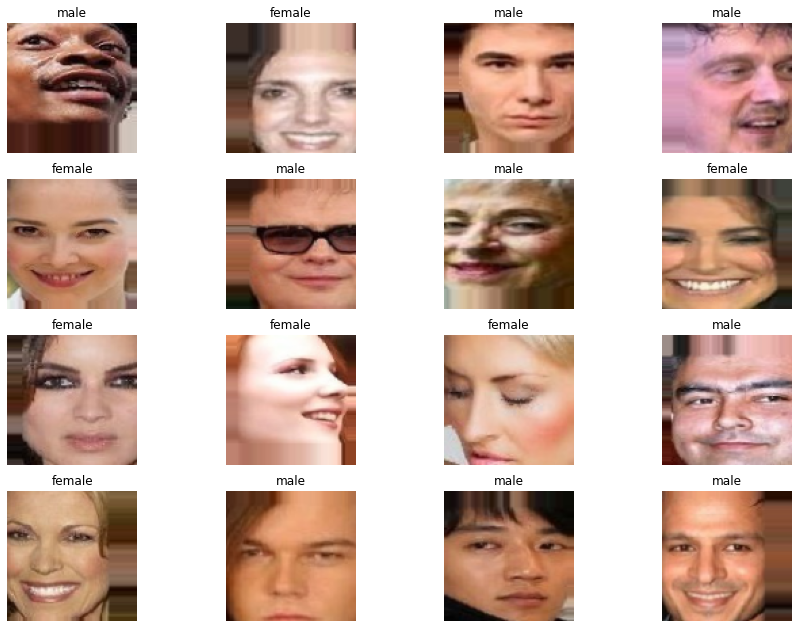

In [6]:
plotImages(x,y)

In [7]:
#Build the model
image_input = Input(shape=(96,96,3))

#The first CNN layer followed by Relu and MaxPooling layers
x = Conv2D(32,(3,3),activation = "relu")(image_input)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

#The second CNN layer followed by Relu and MaxPooling layers
x = Conv2D(64,(3,3),activation = "relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

#The third CNN layer followed by Relu and MaxPooling layers
x = Conv2D(128,(3,3),activation = "relu")(x)
x = BatchNormalization()(x)
x = MaxPooling2D((2,2))(x)
x = Dropout(0.2)(x)

#Flatten layer
x = Flatten()(x)

#Dense layer
x = Dense(256,activation="relu")(x)
x = BatchNormalization()(x)
x = Dropout(0.5)(x)

#The Final layer
image_output = Dense(2,activation="softmax")(x)

model = Model(image_input,image_output)

In [8]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 96, 96, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 94, 94, 32)        896       
                                                                 
 batch_normalization (BatchN  (None, 94, 94, 32)       128       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 47, 47, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 47, 47, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 45, 45, 64)        18496 

In [9]:
model.compile(optimizer="adam",loss="categorical_crossentropy",metrics=["accuracy"])

In [10]:
my_calls =[EarlyStopping(monitor="val_accuracy",patience=3),ModelCheckpoint("Model.h5",verbose= 1,save_best_only=True,mode='auto')]
            

In [11]:
#Training The Model
hist = model.fit(trainds,epochs=22,validation_data=valds,callbacks=my_calls)

Epoch 1/22
1249/1249 [==============================] - ETA: 0s - loss: 0.4647 - accuracy: 0.7973
Epoch 1: val_loss improved from inf to 0.42453, saving model to Model.h5
1249/1249 [==============================] - 2824s 2s/step - loss: 0.4647 - accuracy: 0.7973 - val_loss: 0.4245 - val_accuracy: 0.8102
Epoch 2/22
1249/1249 [==============================] - ETA: 0s - loss: 0.2483 - accuracy: 0.8994
Epoch 2: val_loss improved from 0.42453 to 0.22164, saving model to Model.h5
1249/1249 [==============================] - 1102s 882ms/step - loss: 0.2483 - accuracy: 0.8994 - val_loss: 0.2216 - val_accuracy: 0.9121
Epoch 3/22
1249/1249 [==============================] - ETA: 0s - loss: 0.2152 - accuracy: 0.9165
Epoch 3: val_loss did not improve from 0.22164
1249/1249 [==============================] - 830s 664ms/step - loss: 0.2152 - accuracy: 0.9165 - val_loss: 0.2365 - val_accuracy: 0.9105
Epoch 4/22
1249/1249 [==============================] - ETA: 0s - loss: 0.1960 - accuracy: 0.9248
E

In [12]:
#Test The Model
model.evaluate(testds)

365/365 [==============================] - 187s 512ms/step - loss: 0.1235 - accuracy: 0.9555


[0.12354175746440887, 0.9555326700210571]

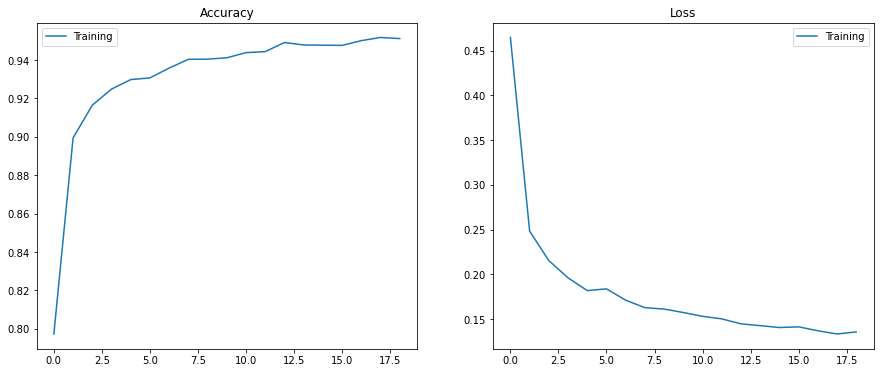

In [20]:
plt.figure(figsize=(15,6))

plt.subplot(1,2,1)
plt.plot(hist.epoch,hist.history['accuracy'],label = 'Training')
#plt.plot(hist.epoch,hist.history['val_accuracy'],label = 'validation')

plt.title("Accuracy")
plt.legend()

plt.subplot(1,2,2)
plt.plot(hist.epoch,hist.history['loss'],label = 'Training')
#plt.plot(hist.epoch,hist.history['val_loss'],label = 'validation')

plt.title("Loss")
plt.legend()

plt.show()


In [19]:
#The Predictions
y_pred = model.predict(testds,verbose=1)

365/365 [==============================] - 215s 590ms/step


In [21]:
y_test = testds.classes

In [24]:
predicted,confidence = [np.argmax(i) for i in y_pred],[np.round((max(i)*100),2) for i in y_pred]


In [25]:
print(classification_report(predicted,y_test))

              precision    recall  f1-score   support

           0       0.99      0.93      0.96      6243
           1       0.92      0.99      0.95      5406

    accuracy                           0.96     11649
   macro avg       0.96      0.96      0.96     11649
weighted avg       0.96      0.96      0.96     11649



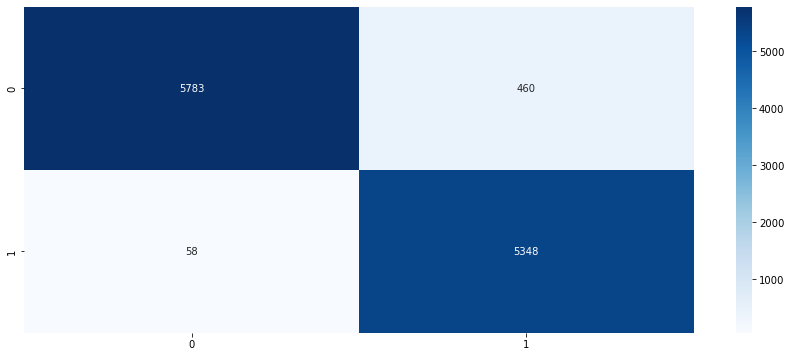

In [26]:
plt.figure(figsize=[15,6])
sns.heatmap(confusion_matrix(predicted,y_test),annot=True,fmt="d",cmap="Blues");

In [27]:
# save the model to disk
model.save('gender_detection_project.model')

INFO:tensorflow:Assets written to: gender_detection_project.model\assets
